In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import golden

In [2]:
ordini = pd.read_csv('Tipo di Acquisti e Ordini.csv', sep=',')

In [3]:
pd.set_option('display.max_rows', ordini.shape[0]+1)
ordini = ordini[["Tipo dato", "Sesso", "Classe di età", "TIME", "Value"]]
ordini

,Tipo dato,Sesso,Classe di età,TIME,Value
0,prodotti alimentari,maschi,20-24 anni,2005,3.8
1,prodotti alimentari,maschi,20-24 anni,2006,4.9
2,prodotti alimentari,maschi,20-24 anni,2007,1.0
3,prodotti alimentari,maschi,20-24 anni,2008,1.8
4,prodotti alimentari,maschi,20-24 anni,2009,2.2
5,prodotti alimentari,maschi,20-24 anni,2010,2.3
6,prodotti alimentari,maschi,20-24 anni,2011,3.0
7,prodotti alimentari,maschi,20-24 anni,2012,3.5
8,prodotti alimentari,maschi,20-24 anni,2013,2.0
9,prodotti alimentari,maschi,20-24 anni,2014,4.7


In [4]:
categorie = ordini["Tipo dato"].drop_duplicates()
lista_categorie = categorie.values.tolist()
lista_categorie


['prodotti alimentari',
 'articoli per la casa',
 'farmaci',
 'abiti, articoli sportivi',
 'film, musica',
 'libri (inclusi e-book)',
 'giornali, riviste',
 'materiale per la formazione a distanza',
 'software per computer e/o aggiornamenti',
 'videogiochi e/o loro aggiornamenti',
 'hardware per computer',
 'attrezzature elettroniche',
 'servizi di telecomunicazione',
 'azioni, servizi finanziari e/o assicurativi',
 'pernottamenti per vacanze',
 'altre spese di viaggio per vacanze',
 'biglietti per spettacoli',
 'biglietti per lotterie o scommesse',
 'altro']

In [5]:
categorie = ordini["TIME"].drop_duplicates()
anni = categorie.values.tolist()
anni

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [6]:
list = ['prodotti alimentari', 'farmaci'] # Articoli di prima necessità
#Svago: 'film, musica', 'libri (inclusi e-book)', 'giornali, riviste', 'software per computer e/o aggiornamenti',
#       'videogiochi e/o loro aggiornamenti', 'biglietti per spettacoli'
#Beni Personali: 'articoli per la casa', 'abiti, articoli sportivi'

In [7]:
#Articoli di Prima Necessità

df_articolidiprimanecessità = ordini[((ordini["Sesso"]=='totale') & (ordini["Classe di età"]=="14 anni e più"))]
df_articolidiprimanecessità = df_articolidiprimanecessità[((df_articolidiprimanecessità["Tipo dato"]=='prodotti alimentari') | (df_articolidiprimanecessità["Tipo dato"]=='farmaci'))]
df_articolidiprimanecessità = df_articolidiprimanecessità[["TIME", "Value"]]
df_articolidiprimanecessità = df_articolidiprimanecessità.groupby("TIME").mean()
df_articolidiprimanecessità

,Value
TIME,
2005,3.35
2006,2.50
2007,1.80
2008,2.10
2009,2.95
2010,3.40
2011,3.95
2012,3.25
2013,3.90


In [8]:
Valori_apn = df_articolidiprimanecessità["Value"].values.tolist()
Valori_apn

[3.35,
 2.5,
 1.8,
 2.1,
 2.95,
 3.4,
 3.95,
 3.25,
 3.9000000000000004,
 4.1000000000000005,
 3.8,
 5.1,
 6.300000000000001,
 8.05,
 9.15]

In [9]:
#Svago

df_svago = ordini[((ordini["Sesso"]=='totale') & (ordini["Classe di età"]=="14 anni e più"))]
df_svago = df_svago[((df_svago["Tipo dato"]=='film, musica') | (df_svago["Tipo dato"]=='libri (inclusi e-book)')| (df_svago["Tipo dato"]=='giornali, riviste')| (df_svago["Tipo dato"]=='software per computer e/o aggiornamenti')| (df_svago["Tipo dato"]=='videogiochi e/o loro aggiornamenti')| (df_svago["Tipo dato"]=='biglietti per spettacoli'))]
df_svago = df_svago[["TIME", "Value"]]
df_svago = df_svago.groupby("TIME").mean()
df_svago

,Value
TIME,
2005,5.783333
2006,6.966667
2007,6.633333
2008,6.433333
2009,10.183333
2010,9.800000
2011,10.666667
2012,8.966667
2013,15.150000


In [10]:
Valori_svago = df_svago["Value"].values.tolist()
Valori_svago

[5.783333333333334,
 6.966666666666666,
 6.633333333333333,
 6.433333333333334,
 10.183333333333334,
 9.799999999999999,
 10.666666666666666,
 8.966666666666667,
 15.15,
 14.233333333333334,
 11.716666666666669,
 10.983333333333334,
 11.383333333333335,
 11.516666666666666,
 12.133333333333333]

In [11]:
#Beni Secondari

df_secondari = ordini[((ordini["Sesso"]=='totale') & (ordini["Classe di età"]=="14 anni e più"))]
df_secondari = df_secondari[((df_secondari["Tipo dato"]=='articoli per la casa') | (df_secondari["Tipo dato"]=='abiti, articoli sportivi'))]
df_secondari = df_secondari[["TIME", "Value"]]
df_secondari = df_secondari.groupby("TIME").mean()
df_secondari

,Value
TIME,
2005,12.50
2006,15.20
2007,17.45
2008,20.30
2009,18.20
2010,19.95
2011,24.55
2012,23.45
2013,25.85


In [12]:
Valori_bs = df_secondari["Value"].values.tolist()
Valori_bs

[12.5,
 15.2,
 17.45,
 20.3,
 18.2,
 19.95,
 24.549999999999997,
 23.45,
 25.85,
 30.299999999999997,
 31.6,
 33.5,
 37.5,
 40.05,
 41.25]

In [13]:
list_focus = [Valori_apn[0]]
list_focus.append(Valori_svago[0])
list_focus.append(Valori_bs[0])
list_focus

[3.35, 5.783333333333334, 12.5]

In [14]:
list_focus_nuova = [Valori_apn[14]]
list_focus_nuova.append(Valori_svago[14])
list_focus_nuova.append(Valori_bs[14])
list_focus_nuova

[9.15, 12.133333333333333, 41.25]

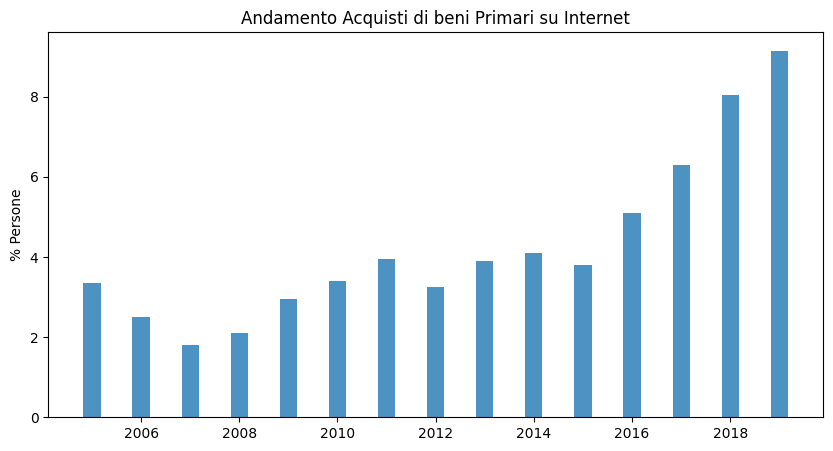

In [15]:
#Articoli di Prima Necessità
labels = anni

plt.rc('figure', figsize=(10.0, 5.0))
fig, ax = plt.subplots()
width = 0.35 
ax.bar(labels, Valori_apn, width, label='Articoli di Prima Necessità', alpha = 0.8)

ax.set_ylabel('% Persone')
ax.set_title('Andamento Acquisti di beni Primari su Internet')
plt.show()

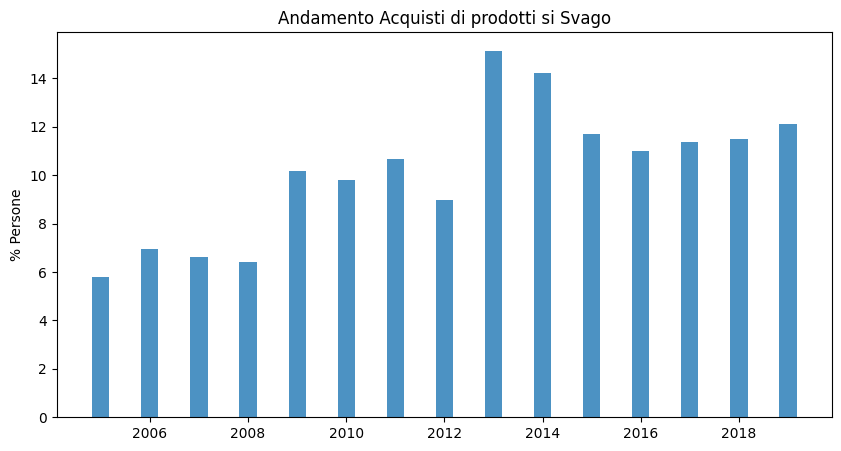

In [16]:
#Articoli di Svago
labels = anni
fig, ax = plt.subplots()
width = 0.35 
ax.bar(labels, Valori_svago, width, label='Articoli di Svago', alpha = 0.8)

ax.set_ylabel('% Persone')
ax.set_title('Andamento Acquisti di prodotti si Svago')
plt.rc('figure', figsize=(10.0, 5.0))
plt.show()

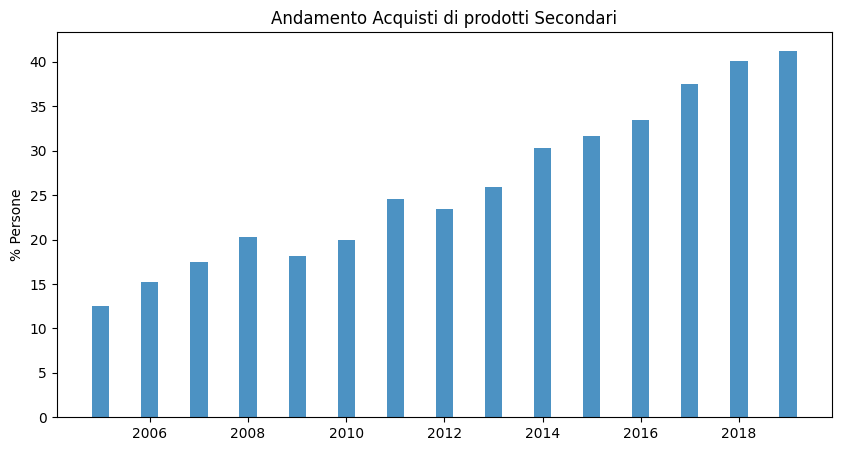

In [17]:
#Articoli Secondari
labels = anni
fig, ax = plt.subplots()
width = 0.35 
ax.bar(labels, Valori_bs, width, label='Beni Secondari', alpha = 0.8)

ax.set_ylabel('% Persone')
ax.set_title('Andamento Acquisti di prodotti Secondari')
plt.rc('figure', figsize=(10.0, 5.0))
plt.show()

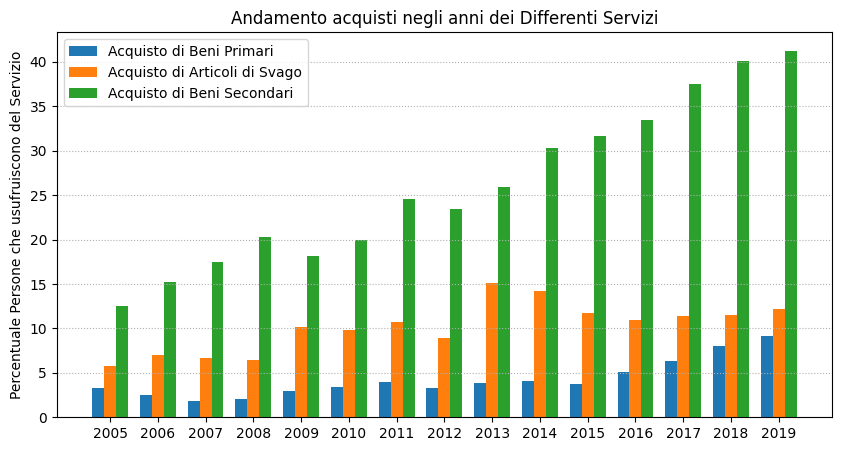

In [18]:
#Mixed
labels = anni
width = 0.25       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


x = np.arange(len(labels))  # the label locations

ax.bar(x - width, Valori_apn, width, label='Acquisto di Beni Primari', alpha = 1)
ax.bar(x, Valori_svago, width, label='Acquisto di Articoli di Svago', alpha = 1)
ax.bar(x + width, Valori_bs, width, label='Acquisto di Beni Secondari', alpha = 1)



ax.set_xticks(x, labels)

ax.set_ylabel('Percentuale Persone che usufruiscono del Servizio')
ax.set_title('Andamento acquisti negli anni dei Differenti Servizi')
ax.legend()
plt.rc('figure', figsize=(10.0, 5.0))
plt.grid(axis = 'y', linestyle=':')
plt.show()

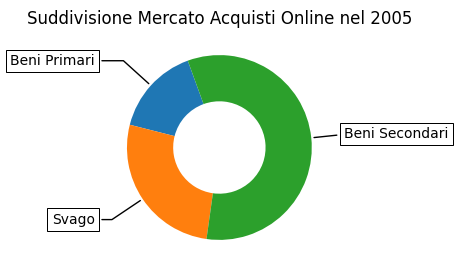

In [19]:
#Spartizione Iniziale Mercato

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))



recipe = ["Beni Primari",
          "Svago",
          "Beni Secondari"]

data = list_focus

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=110)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Suddivisione Mercato Acquisti Online nel 2005")

plt.show()

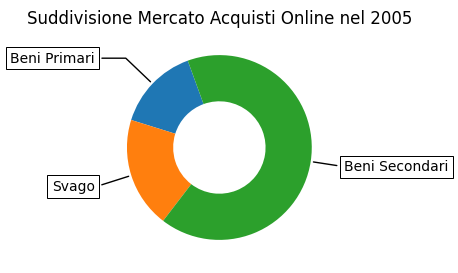

In [20]:
#Spartizione Finale Mercato

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))



recipe = ["Beni Primari",
          "Svago",
          "Beni Secondari"]

data = list_focus_nuova

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=110)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Suddivisione Mercato Acquisti Online nel 2005")

plt.show()